<a href="https://colab.research.google.com/github/hany606/LCT_Spring20IU/blob/master/Hany_Hamed_Lab_2_Basic_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Info

Name: Hany Hamed

Group: BS18-06

Assignment 2


# Stabilization
Considen an unstable system:
$$\begin{bmatrix} \dot x_1 \\ \dot x_2 \end{bmatrix} = 
\begin{bmatrix} 
10 & 3 \\
5 & -5 
\end{bmatrix} 
\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$$
It's eigenvalues are $\lambda_1 = 10.94$ and $\lambda_2 = -5.94$.

Let's solve it forward:

eigenvalues of A: [10.94097151 -5.94097151]


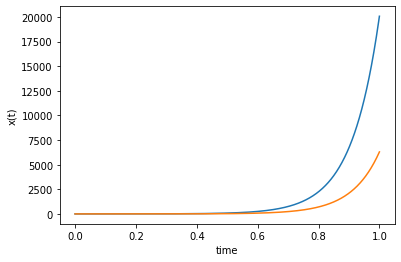

In [149]:
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import sin, cos

A = np.array([[10, 3], [5, -5]]) # state matrix
e, v = eig(A)
print("eigenvalues of A:", e)

def LTV(x, t):
    return A.dot(x)

time = np.linspace(0, 1, 1000)    # interval from 0 to 1
x0 = np.random.rand(2)            # initial state

solution = odeint(LTV, x0, time)

plt.plot(time, solution)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

If we add a controller to that system:

$$\begin{bmatrix} \dot x_1 \\ \dot x_2 \end{bmatrix} = 
\begin{bmatrix} 
10 & 3 \\
5 & -5 
\end{bmatrix} 
\begin{bmatrix}x_1 \\ x_2 \end{bmatrix} + 
\begin{bmatrix}1 \\ 0 \end{bmatrix} u$$

then a control law
$$u = - 20 x_1$$

can make the system stable:






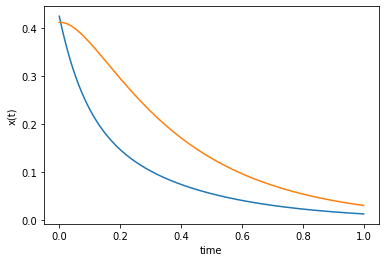

In [150]:
k = 20
B = np.array([1, 0])              # input matrix

def LTV(x, t):    
    u = -k*x[0]    
    return A.dot(x) + B*u

x0 = np.random.rand(2)

solution = odeint(LTV, x0, time)

plt.plot(time, solution)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

As we can see, the system now converges to zero. That was **proportional control**.

# Proportional-derivative (PD) control

Consider a second order linear ODE:

$$\ddot x + \mu \dot x + k x= u$$

We can use P control:

$$u = k_p (x^*-x)$$

or we can add a derivative term:

$$u = k_d (\dot x^*- \dot x) + k_p (x^*-x) $$

This is a **PD controller**.

Let us introduce $e =  x^*-x$. Then we have:

$$u = k_d \dot e + k_p e $$

Variable $e$ here is a **control error**.


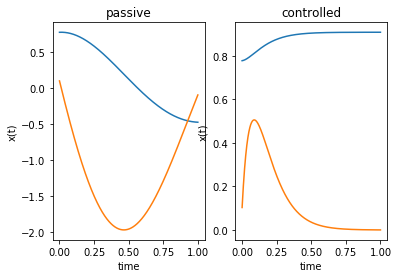

In [250]:
mu = 1;
k = 10;

x_desired = 1
x_dot_desired = 0

kp = 100;
kd = 20;

# This is direct calculation of the solutions without representing with state space model and without any control, like DE representation
def Oscillator(x, t):
    return np.array([x[1], (- mu*x[1] - k*x[0])])

def Oscillator_Control(x, t):
    error     = x_desired     - x[0]
    error_dot = x_dot_desired - x[1]
    u = kp*error + kd*error_dot    
    return np.array([x[1], (u - mu*x[1] - k*x[0])])

x0 = np.random.rand(2)

solution = {"Oscillator": odeint(Oscillator, x0, time), "Oscillator_Control": odeint(Oscillator_Control, x0, time)}

plt.subplot(121)
plt.plot(time, solution["Oscillator"])
plt.xlabel('time')
plt.ylabel('x(t)')
plt.title('passive')

plt.subplot(122)
plt.plot(time, solution["Oscillator_Control"])
plt.xlabel('time')
plt.ylabel('x(t)')
plt.title('controlled')
plt.show()

# Reaction to a step function



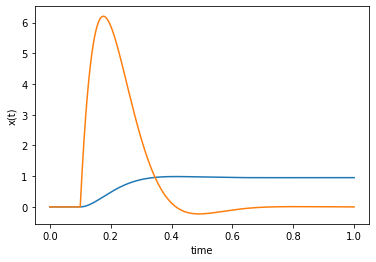

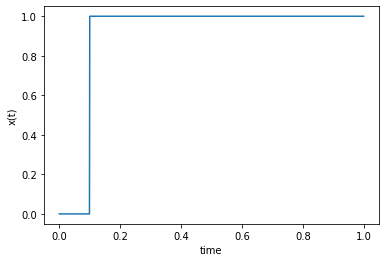

In [152]:

kp = 200;
kd = 20;

def StepFunction(t):
    return 0 if t < 0.1 else 1
    
def Oscillator_StepFunction(x, t):
    x_desired = StepFunction(t)    
    error     = x_desired     - x[0]
    error_dot = x_dot_desired - x[1]  # As it is predefined in the prev. cell = 0
    u = kp*error + kd*error_dot    
    return np.array([x[1], (u - mu*x[1] - k*x[0])])

x0 = np.zeros((2))

solution = odeint(Oscillator_StepFunction, x0, time)

plt.plot(time, solution)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

t_step_function = []
for i in time:
  t_step_function.append(StepFunction(i))

plt.plot(time, t_step_function)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

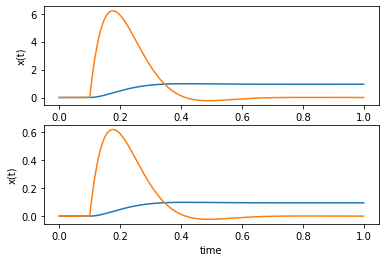

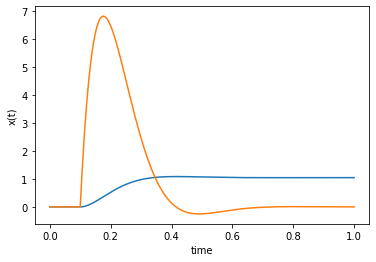

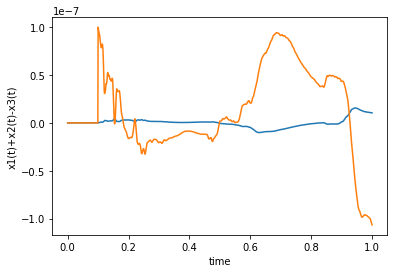

In [153]:

def StepFunction1(t):
    return [0, 0] if t < 0.1 else [1, 0]
    
def StepFunction2(t):
    return [0, 0] if t < 0.1 else [0, 1]
    
def StepFunction3(t):
    return [0, 0] if t < 0.1 else [1, 1]
   
def GetOscillator_StepFunction(StepFunction):
    # define function for particular case
    def Oscillator_StepFunction(x, t):
        x_desired = StepFunction(t)
        error     = x_desired[0] - x[0]
        error_dot = x_desired[1] - x[1]
        u = kp*error + kd*error_dot
        return np.array([x[1], (u - mu*x[1] - k*x[0])])

    return Oscillator_StepFunction

x0 = np.zeros((2))

# change first state
Oscillator_StepFunction = GetOscillator_StepFunction(StepFunction1)
solution1 = odeint(Oscillator_StepFunction, x0, time)

plt.subplot(211)
plt.plot(time, solution1)
plt.xlabel('time')
plt.ylabel('x(t)')

# change second state
Oscillator_StepFunction = GetOscillator_StepFunction(StepFunction2)
solution2 = odeint(Oscillator_StepFunction, x0, time)

plt.subplot(212)
plt.plot(time, solution2)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

# change both states
Oscillator_StepFunction = GetOscillator_StepFunction(StepFunction3)
solution3 = odeint(Oscillator_StepFunction, x0, time)

plt.plot(time, solution3)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

# comparison
plt.plot(time, solution1+solution2-solution3)
plt.xlabel('time')
plt.ylabel('x1(t)+x2(t)-x3(t)')
plt.show()

# Your task:

* Make x_desired and x_dot_desired change with time (solve trajectory tracking problem).
* Tune controller gains $k_p$ and $k_d$. Find gains that provide no ocsillations and no overshoot.
* Prove that controlled oscillator dynamics $\ddot x + \mu \dot x + k x= k_d (\dot x^*- \dot x) + k_p (x^*-x) $ is stable for your choice of $k_p$ and $k_d$.

* Think of how you would implement PD control for a linear system from the first example.
* Implement a PI / PID controller.




# **Solution: Point 1**
Make x_desired and x_dot_desired change with time (solve trajectory tracking problem).


I have added step function to stop the changing of the $x^*$ and $\dot x^*$ with the time

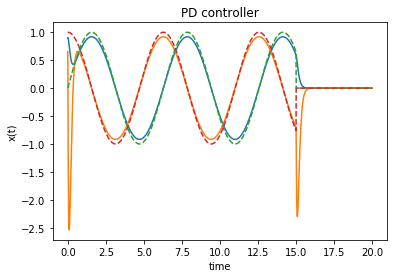

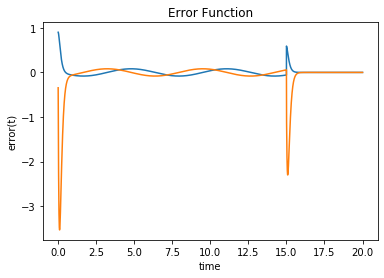

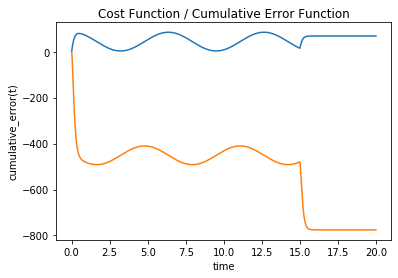

In [154]:
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import sin, cos

cumulative_error = [[0,0]]
error = []
mu = 1;
k = 10;

def StepFunction(t):
    return 0 if t > 15 else 1

def x_desired_func(t):
  return sin(t)*StepFunction(t)

def x_dot_desired_func(t):
  return cos(t)*StepFunction(t)

kp = 100;
kd = 20;

def calc_cumulative_error(solution, desired, time):
  error_loc = [0,0]
  for i,t in enumerate(time):
    error_loc[0] = solution[i][0] - desired[i][0]
    error_loc[1] = solution[i][1] - desired[i][1]
    cumulative_error.append([error_loc[0]+cumulative_error[len(cumulative_error)-1][0], error_loc[1]+cumulative_error[len(cumulative_error)-1][1]])
    error.append([error_loc[0], error_loc[1]])


def Oscillator_Control(x, t):
    error     = x_desired_func(t)     - x[0]
    error_dot = x_dot_desired_func(t) - x[1]
    u = kp*error + kd*error_dot
    return np.array([x[1], (u - mu*x[1] - k*x[0])])

x0 = np.random.rand(2)
time = np.linspace(0, 20, 10000)    # interval from 0 to 1

x_desired = [x_desired_func(i) for i in time]
x_dot_desired = [x_dot_desired_func(i) for i in time]

solution = {"PD_Control": odeint(Oscillator_Control, x0, time)}


plt.plot(time, solution["PD_Control"])

plt.plot(time, x_desired, linestyle="dashed")
plt.plot(time, x_dot_desired, linestyle="dashed")

plt.xlabel('time')
plt.ylabel('x(t)')
plt.title('PD controller')
plt.show()

x_desired_merge = list(zip(x_desired, x_dot_desired))

calc_cumulative_error(solution["PD_Control"], x_desired_merge, time)


plt.plot(time, error)
plt.xlabel('time')
plt.ylabel('error(t)')
plt.title('Error Function')
plt.show()

plt.plot(np.append(time, 20+20/10000), cumulative_error)
plt.xlabel('time')
plt.ylabel('cumulative_error(t)')
plt.title('Cost Function / Cumulative Error Function')
plt.show()

# **Solution: Point 2**
Tune controller gains  kp  and  kd . Find gains that provide no ocsillations and no overshoot.





I have changed the kp to 250 and kd to 200 and these values decreased the error over the time. The concept of no oscilation will not be very clear as the desired values are oscilating functions sin and cosine, if they are changed to linear will see the concept of oscilating on the system.  

For the overshooting, these values decreased the overshooting over time.

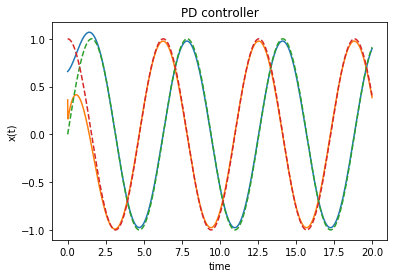

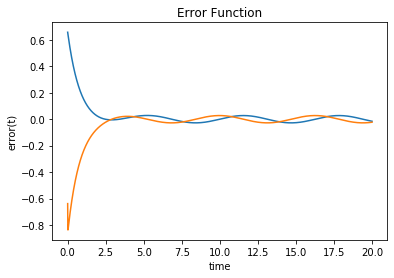

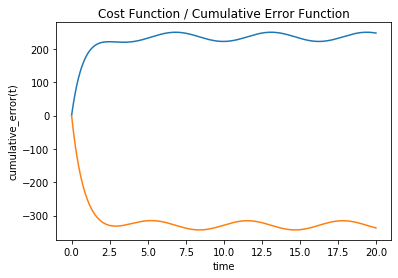

In [193]:
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import sin, cos

cumulative_error = [[0,0]]
error = []
mu = 1;
k = 10;

def StepFunction(t):
    return 0 if t > 15 else 1

def x_desired_func(t):
  return sin(t)
  # return 5
  # return sin(t)*StepFunction(t)
  # return (t+10)*StepFunction(t)

def x_dot_desired_func(t):
  return cos(t)
  # return 1
  # return cos(t)*StepFunction(t)
  # return (t)*StepFunction(t)

# For sin and cosine desired functions
kp = 250;
kd = 200;

# For linear desired functions
# kp = 700
# kd = 170

def calc_cumulative_error(solution, desired, time):
  error_loc = [0,0]
  for i,t in enumerate(time):
    error_loc[0] = solution[i][0] - desired[i][0]
    error_loc[1] = solution[i][1] - desired[i][1]
    cumulative_error.append([error_loc[0]+cumulative_error[len(cumulative_error)-1][0], error_loc[1]+cumulative_error[len(cumulative_error)-1][1]])
    error.append([error_loc[0], error_loc[1]])


def Oscillator_Control(x, t):
    error     = x_desired_func(t)     - x[0]
    error_dot = x_dot_desired_func(t) - x[1]
    u = kp*error + kd*error_dot
    return np.array([x[1], (u - mu*x[1] - k*x[0])])

x0 = np.random.rand(2)
time = np.linspace(0, 20, 10000)    # interval from 0 to 1

x_desired = [x_desired_func(i) for i in time]
x_dot_desired = [x_dot_desired_func(i) for i in time]

solution = {"PD_Control": odeint(Oscillator_Control, x0, time)}


plt.plot(time, solution["PD_Control"])

plt.plot(time, x_desired, linestyle="dashed")
plt.plot(time, x_dot_desired, linestyle="dashed")

plt.xlabel('time')
plt.ylabel('x(t)')
plt.title('PD controller')
plt.show()

x_desired_merge = list(zip(x_desired, x_dot_desired))

calc_cumulative_error(solution["PD_Control"], x_desired_merge, time)


plt.plot(time, error)
plt.xlabel('time')
plt.ylabel('error(t)')
plt.title('Error Function')
plt.show()

plt.plot(np.append(time, 20+20/10000), cumulative_error)
plt.xlabel('time')
plt.ylabel('cumulative_error(t)')
plt.title('Cost Function / Cumulative Error Function')
plt.show()

# **Solution: Point 3**
Prove that controlled oscillator dynamics $\ddot x + \mu \dot x + k x= k_d (\dot x^*- \dot x) + k_p (x^*-x) $ is stable for your choice of $k_p$ and $k_d$.




To prove it that the system is stable with the chosen:

From observing the experiment, we will find that the error function converges to approximately 0 (0-$\delta$, 0+$\delta$) in the 2nd plot such that $\delta\$ is small value.


Or it can be proven mathematically by insure that the solutions of the system will not diverge.

Our system
$\ddot x + \mu \dot x + k x= k_d (\dot x^*- \dot x) + k_p (x^*-x) $

with change of variables:

$x_1 = x ,\ x_2  =\dot x$

$\begin{bmatrix}\dot x \\ \ddot x\end{bmatrix} = \begin{bmatrix} 0 & 1 \\ -k-d_d & -\mu-k_d \end{bmatrix} \begin{bmatrix} x \\ \dot x\end{bmatrix} + \begin{bmatrix} 0 & 0 \\ k_p & k_d\end{bmatrix} \begin{bmatrix}x^* = sin t \\ \dot x^* = cos t \end{bmatrix}$

Then we have a non-homogenous of DE system which the solution consists of the complementary solution and the particulary solution, and to prove that it is stable we need to prove that both solutions converges.

For the complementary solution, we can prove that by the real parts of the eigenvalues are negative of the A matrix as $k_p = 250, k_d = 100, \mu = 1, k = 10$ then **A** = $\begin{bmatrix} 0 & 1 \\ -260 & -101 \end{bmatrix}$

Then to get eigenvalues of **A**, det(A-I$\lambda) = 0$ 

$\lambda(101+\lambda) + 260 = 0$

$\lambda^2 + 101 \lambda + 260 = 0$ and their both solutions are negative, then the complementary solution will converge.




For the particulary solution, $x_p = X z(t)$ 

such that: $X = \begin{bmatrix} v_{11}e^{\lambda_1t} & v_{21}e^{\lambda_2t} \\ v_{12}e^{\lambda_1t} & v_{22}e^{\lambda_2t}\end{bmatrix}$, v_1 is the eigenvector for the $1^{st}$ eigenvalue and $v_{11}$ is the first element in that vector,

$X\dot z = \begin{bmatrix} 0 & 0 \\ k_p & k_d\end{bmatrix} \begin{bmatrix}sin t \\ cos t \end{bmatrix} = g(t)$

then $z = \int X^{-1} g(t) dt$

$X^{-1} = \begin{bmatrix}  v_{22}e^{\lambda_2t} & -v_{21}e^{\lambda_2t} \\ -v_{12}e^{\lambda_1t} & v_{11}e^{\lambda_1t}\end{bmatrix}$

and $\int X^{-1}g(t)dt$ can be solved by parts and repeated integral as following for only the first element in the generated coloumn vector and the rest are the same way.

$\int (25000 v_{22} e^{\lambda_2t}cost - 10000 v_{21}e^{\lambda_2t}sint) dt $

For the first part and the same for the second part of the integral, $I_{11} = \int 25000 v_{22} e^{\lambda_2t}cost dt =  25000 v_{22} e^{\lambda_2t} * sint + 25000\lambda_2 v_{22} e^{\lambda_2t}cost + \int 25000\lambda_2^2 v_{22} e^{\lambda_2t} cost \ dt = 25000 v_{22} e^{\lambda_2t} * sint + 25000\lambda_2 v_{22} e^{\lambda_2t}cost + \lambda^2 I_{11}$ 

Then $I_{11} = \frac{25000 v_{22} e^{\lambda_2t} * sint + 25000\lambda_2 v_{22} e^{\lambda_2t}cost}{1-\lambda_2^2}$ 

as all the eigenvalues are negative then as $t \rightarrow \infty, e^{{\lambda_i}t} \rightarrow 0$ then there will be no oscilations or divergence in any part of the particulary solution as long as no eigenvalue = -1 as the denominator will be equal to 0 and in our case they are not equal to -1.


# **Solution: Point 4**

Think of how you would implement PD control for a linear system from the first example.

The linear system in the first example:

$$\begin{bmatrix} \dot x_1 \\ \dot x_2 \end{bmatrix} = 
\begin{bmatrix} 
10 & 3 \\
5 & -5 
\end{bmatrix} 
\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$$

From that system we need to clarify that $\dot x_1 \neq x_2$ this means that $x_2 \neq \dot x$ and $x_1 \neq x$, this system is not stable by itself as it has one of the eigenvalues is positive.

Our system with controller:


$$\begin{bmatrix} \dot x_1 \\ \dot x_2 \end{bmatrix} = 
\begin{bmatrix} 
10 & 3 \\
5 & -5 
\end{bmatrix} 
\begin{bmatrix}x_1 \\ x_2 \end{bmatrix} + u$$

then the PD controller will be in the following form as in the previous example
$$u = (k_p (x^* - x) + k_d (\dot x^* - \dot x))$$

Such that, x is $\begin{bmatrix}x_1 \\ x_2\end{bmatrix}$




and with suitable coefficients the system will be stable


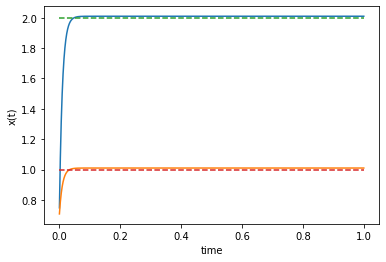

In [210]:
A = np.array([[10, 3], [5, -5]]) # state matrix
B = np.array([[1, 0], [0,1]])              # input matrix
# B = np.array([1,1])
x_desired = np.array([2,1])
x_desired_dot = np.array([1,1])

kp = 100
kd = 1

def LTV(x, t):
  sys = A.dot(x)
  error = x_desired - x
  error_dot = x_desired_dot - sys
  u = kp*error + kd*error_dot 
  return sys + B.dot(u)

x0 = np.random.rand(2)
time = np.linspace(0, 1, 1000)    # interval from 0 to 1

solution = odeint(LTV, x0, time)

plt.plot(time, solution)

plt.plot(time, [x_desired for i in time], linestyle="dashed")
# plt.plot(time, [x_desired_dot for i in time], linestyle="dashed")

plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()


# **Solution: Point 5**
Implement a PI / PID controller for the folowing system
 $$ \ddot x + \mu \dot x + k x= k_d (\dot x^*- \dot x) + k_p (x^*-x) $$
 

 The system will be as following:
  $$ \ddot x + \mu \dot x + k x= k_d (\dot x^*- \dot x) + k_p (x^*-x) + k_i(\int_{0}^{t} (x^* - x) dt)$$

  as the integral is just summation, it can be coded easily.

  To implement PI controller the $k_d = 0$ and adjust the values of $k_p\ and\ k_i$

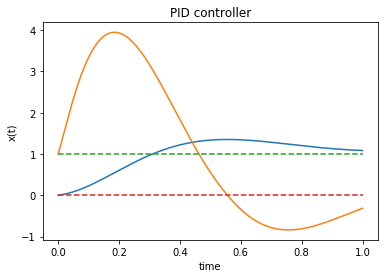

In [390]:
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import sin, cos

cumulative_error = [[0,0]]
# error = []
mu = 1;
k = 10;

def StepFunction(t):
    return 0 if t > 15 else 1

def x_desired_func(t):
  # return sin(t)
  return 1
  # return sin(t)*StepFunction(t)
  # return (t+10)*StepFunction(t)

def x_dot_desired_func(t):
  # return cos(t)
  return 0
  # return cos(t)*StepFunction(t)
  # return (t)*StepFunction(t)

kp = 30
ki = 0.0004
kd = 5

# def calc_cumulative_error(solution, desired, time):
#   error_loc = [0,0]
#   for i,t in enumerate(time):
#     error_loc[0] = solution[i][0] - desired[i][0]
#     error_loc[1] = solution[i][1] - desired[i][1]
#     cumulative_error.append([error_loc[0]+cumulative_error[len(cumulative_error)-1][0], error_loc[1]+cumulative_error[len(cumulative_error)-1][1]])
#     error.append([error_loc[0], error_loc[1]])


error_cumulative_i = 0


def Oscillator_Control_PID(x, t):
    error     = x_desired_func(t)     - x[0]
    error_dot = x_dot_desired_func(t) - x[1]
    global error_cumulative_i    
    u = kp*error + kd*error_dot + ki*error_cumulative_i
    error_cumulative_i += error
    # print(error)
    return np.array([x[1], (u - mu*x[1] - k*x[0])])

x0 = np.array([0,1])
time = np.linspace(0, 1, 1000)    # interval from 0 to 1

x_desired = [x_desired_func(i) for i in time]
x_dot_desired = [x_dot_desired_func(i) for i in time]

solution = {"PID_Control": odeint(Oscillator_Control_PID, x0, time)}


plt.plot(time, solution["PID_Control"])

plt.plot(time, x_desired, linestyle="dashed")
plt.plot(time, x_dot_desired, linestyle="dashed")

plt.xlabel('time')
plt.ylabel('x(t)')
plt.title('PID controller')
plt.show()

# x_desired_merge = list(zip(x_desired, x_dot_desired))

# calc_cumulative_error(solution["PID_Control"], x_desired_merge, time)


# plt.plot(time, error)
# plt.xlabel('time')
# plt.ylabel('error(t)')
# plt.title('Error Function')
# plt.show()

# plt.plot(np.append(time, 20+20/10000), cumulative_error)
# plt.xlabel('time')
# plt.ylabel('cumulative_error(t)')
# plt.title('Cost Function / Cumulative Error Function')
# plt.show()